
# Graduate Rotational Internship program


The Sparks Foundation




Computer Vision & Internet of Things

Task 4: Detection Of Face Mask

Amishi Vijay

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import shutil

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
data_path = 'C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/dataset/'
with_mask_path = 'C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/dataset/with_mask/'
without_mask_path = 'C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/dataset/without_mask/'
test_path = 'C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/dataset/testdata'

In [4]:
def plot(mask_list, with_mask_path, num_img,num_rows):
  """
  showing images 
  """

  if num_img%num_rows==0:
       plt.figure(figsize=(10,10))
       j=1
       for i in random.sample(mask_list,num_img):    # random sample containing names of images 
          img= cv2.imread( with_mask_path + i)
          img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
          a=num_rows

  
          plt.subplot(a, int(len(random.sample(mask_list,num_img))/a), j)
          plt.imshow(img)
          plt.title(str(img.shape))
          j+=1

MASK IMAGES:


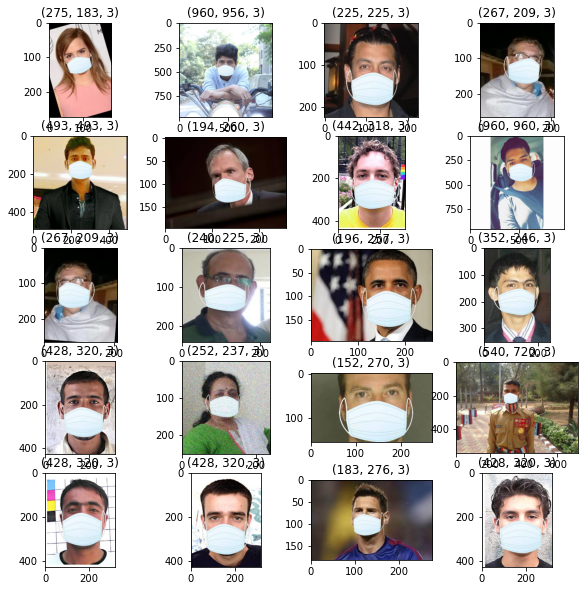

In [5]:
mask_list= sorted(os.listdir(with_mask_path))
no_mask_list=sorted(os.listdir(without_mask_path))

print("MASK IMAGES:")

#plt.figure(figsize=(10,10))
#j=1
#for i in random.sample(mask_list,20):    # random sample containing names of images 
# img= cv2.imread( with_mask_path + i)
 # img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #a=5

  
 # plt.subplot(a, int(len(random.sample(mask_list,20))/a), j)
  #plt.imshow(img)
  #plt.title(str(img.shape))
  #j+=1

plot(mask_list, with_mask_path, 20,5)



NO MASK IMAGES:


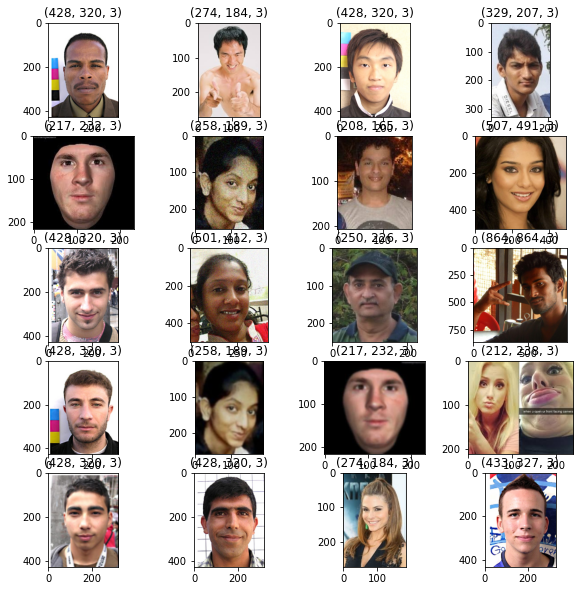

In [6]:
print("NO MASK IMAGES:")


plot(no_mask_list, without_mask_path, 20,5)

In [7]:
print ("TOtal Mask Images: ",len(mask_list))
print("Total Non Mask Images: " , len(no_mask_list))

TOtal Mask Images:  676
Total Non Mask Images:  672


# Creating test set

In [8]:
os.mkdir(test_path)
os.mkdir(os.path.join(test_path,'with_mask'))
os.mkdir(os.path.join(test_path,'without_mask'))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/dataset/testdata'

In [9]:
int(np.ceil(len(mask_list)*0.02))  # how many images you want for test from mask_list   ---> abt 2%

14

In [10]:
def move_to_test(mask_list, with_mask_path,a):
    
    """
    a==0: with mask
    """
    num_test=int(np.ceil(len(mask_list)*0.02))   # how many images you want for test from mask_list   ---> abt 2%
    for image in mask_list[-num_test:]:
      if  a==0:  # with mask
          #print(os.path.join(with_mask_path , image),"----", os.path.join(test_path,"with_mask/",image))
          shutil.move(os.path.join(with_mask_path , image),os.path.join(test_path,"with_mask/",image))

      else:   # without mask 
         # print(os.path.join(with_mask_path , image),"----", os.path.join(test_path,"without_mask/",image))
          shutil.move(os.path.join(with_mask_path , image),os.path.join(test_path,"without_mask/",image))


In [11]:
move_to_test(mask_list, with_mask_path,0)

In [12]:
move_to_test(no_mask_list, without_mask_path,1)

In [13]:
 #checking : 

len(os.listdir(without_mask_path)), len(os.listdir(with_mask_path)), len(os.listdir(test_path+"/without_mask")), len(os.listdir(test_path+"/with_mask"))

(658, 662, 28, 28)

# preparing data

In [14]:
batch_size=32

train_gen=ImageDataGenerator(horizontal_flip=True, rescale=1/255., validation_split=0.2)
test_gen=ImageDataGenerator(rescale=1/255.)

In [15]:
Train=train_gen.flow_from_directory(data_path, target_size=(224,224), classes=["with_mask", "without_mask"],class_mode="categorical",
                                    batch_size=batch_size,shuffle=True, seed=1, subset="training" 
                                    )

VAl=train_gen.flow_from_directory(data_path, target_size=(224,224), classes=["with_mask", "without_mask"],class_mode="categorical",
                                    batch_size=batch_size,shuffle=True, seed=1, subset="validation" 
                                    )

Test=test_gen.flow_from_directory(test_path, target_size=(224,224), classes=["with_mask", "without_mask"],class_mode="categorical",
                                    batch_size=batch_size,shuffle=True, seed=1 
                                    )

Found 1057 images belonging to 2 classes.
Found 263 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


# Model Building

In [17]:
Mobile_net=MobileNetV2(input_shape=(224,224,3),include_top=False, weights="imagenet")
Mobile_net.trainable=False 

In [18]:
from keras.layers import LeakyReLU

In [19]:
model=Sequential()
model.add(Mobile_net)
model.add(GlobalAveragePooling2D())
model.add(Dense(64))

# now add a ReLU layer explicitly:
model.add(LeakyReLU(alpha=0.05))

model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,340,098
Trainable params: 82,114
Non-trainable params: 2,257,984
_________________________________________

In [25]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])
checkpoint = ModelCheckpoint('C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/model.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='min')
history = model.fit(Train,epochs = 50,validation_data = VAl,callbacks = [checkpoint])

Epoch 1/50
34/34 [==============================] - 50s 1s/step - loss: 6.6542e-06 - acc: 1.0000 - val_loss: 0.0274 - val_acc: 0.9962

Epoch 00001: val_loss improved from inf to 0.02739, saving model to C:/Users/amish/Face-Mask-Detection-master/face-mask-detector\model.h5
Epoch 2/50
34/34 [==============================] - 41s 1s/step - loss: 1.3836e-05 - acc: 1.0000 - val_loss: 0.0371 - val_acc: 0.9924

Epoch 00002: val_loss did not improve from 0.02739
Epoch 3/50
34/34 [==============================] - 41s 1s/step - loss: 4.1706e-05 - acc: 1.0000 - val_loss: 0.0112 - val_acc: 0.9962

Epoch 00003: val_loss improved from 0.02739 to 0.01119, saving model to C:/Users/amish/Face-Mask-Detection-master/face-mask-detector\model.h5
Epoch 4/50
34/34 [==============================] - 41s 1s/step - loss: 7.1073e-07 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 0.9962

Epoch 00004: val_loss improved from 0.01119 to 0.00734, saving model to C:/Users/amish/Face-Mask-Detection-master/face-mask-detec

34/34 [==============================] - 41s 1s/step - loss: 1.7537e-07 - acc: 1.0000 - val_loss: 0.0260 - val_acc: 0.9924

Epoch 00043: val_loss did not improve from 0.00734
Epoch 44/50
34/34 [==============================] - 41s 1s/step - loss: 8.9495e-06 - acc: 1.0000 - val_loss: 0.0423 - val_acc: 0.9924

Epoch 00044: val_loss did not improve from 0.00734
Epoch 45/50
34/34 [==============================] - 42s 1s/step - loss: 2.7162e-05 - acc: 1.0000 - val_loss: 0.0646 - val_acc: 0.9886

Epoch 00045: val_loss did not improve from 0.00734
Epoch 46/50
34/34 [==============================] - 41s 1s/step - loss: 4.6048e-04 - acc: 0.9994 - val_loss: 0.1075 - val_acc: 0.9886

Epoch 00046: val_loss did not improve from 0.00734
Epoch 47/50
34/34 [==============================] - 42s 1s/step - loss: 1.5638e-05 - acc: 1.0000 - val_loss: 0.0369 - val_acc: 0.9924

Epoch 00047: val_loss did not improve from 0.00734
Epoch 48/50
34/34 [==============================] - 41s 1s/step - loss: 3.23

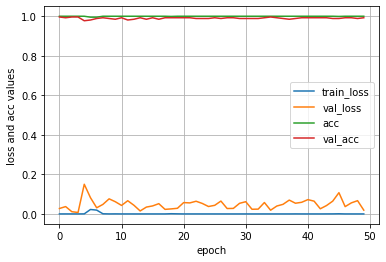

In [26]:
plt.plot( list(range(len(history.history["loss"]))),history.history["loss"], label="train_loss")
plt.plot( list(range(len(history.history["val_loss"]))),history.history["val_loss"], label="val_loss")
plt.plot( list(range(len(history.history["acc"]))),history.history["acc"], label="acc")
plt.plot( list(range(len(history.history["val_acc"]))), history.history["val_acc"], label="val_acc")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss and acc values")
plt.show()
plt.close()

In [27]:
model.evaluate(Test)

2/2 [==============================] - 3s 2s/step - loss: 0.0020 - acc: 1.0000


[0.0020260007586330175, 1.0]